# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Точность достаточно сильно варьируется в зависимости от выбранного random seed, а результат должен быть воспроизводимым")

Точность достаточно сильно варьируется в зависимости от выбранного random seed, а результат должен быть воспроизводимым


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.iloc[list(np.random.randint(0, len(df_train), 10))]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
860,Renault KWID RXT,2016,330000,20000,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
5390,Maruti Ertiga ZDI Plus,2017,825000,79000,Diesel,Dealer,Manual,First Owner,25.47 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,7.0
5226,Hyundai Xcent 1.2 VTVT SX,2020,524000,32000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5191,Mahindra XUV500 W10 2WD,2015,850000,140000,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
3772,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
3092,Toyota Innova 2.5 VX 7 STR,2010,515000,200000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
5734,Skoda Rapid 1.6 TDI Ambition Plus Alloy,2012,380000,145000,Diesel,Individual,Manual,First Owner,20.5 kmpl,1598 CC,103.5 bhp,250Nm@ 1500-2500rpm,5.0
6265,Toyota Innova 2.5 Z Diesel 7 Seater BS IV,2014,950000,80000,Diesel,Dealer,Manual,First Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,7.0
466,Honda City i VTEC VX,2015,900000,22000,Petrol,Individual,Manual,First Owner,17.4 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
5334,Maruti Vitara Brezza ZDi,2019,890000,9000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.iloc[list(range(0, 5)) + list(range(len(df_test)-5, len(df_test)))]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [9]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Колонки mileage, engine, max_power, torque, seats содержат пропуски, одинаковое количество

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
df_train.drop('selling_price', axis=1).duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [11]:
df_train.drop('selling_price', axis=1)[df_train.drop('selling_price', axis=1).duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [12]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [13]:
df_train.drop_duplicates(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
                         keep='first',
                        inplace=True)

In [14]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
df_train.reset_index(inplace=True)
df_train = df_train.drop('index', axis=1)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [16]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].str.split(' ').fillna(0).str[0].str.extract(r'(\d+)', expand=False).astype(float)
    df_test[col] = df_test[col].str.split(' ').fillna(0).str[0].str.extract(r'(\d+)', expand=False).astype(float)

In [17]:
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [18]:
for i in ['mileage', 'engine', 'max_power', 'seats']:
    med = df_train[i].median()
    df_train[i] = df_train[i].fillna(med)
    df_test[i] = df_test[i].fillna(med)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [19]:
print("Потому что количество мест не характеризует объект численно, например, сильно отличаются маршрутка на 8 мест или кабриолет на 2 места не в пользу маршрутки")

Потому что количество мест не характеризует объект численно, например, сильно отличаются маршрутка на 8 мест или кабриолет на 2 места не в пользу маршрутки


In [20]:
df_train['engine'] = df_train['engine'].astype('int')
df_test['engine'] = df_test['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

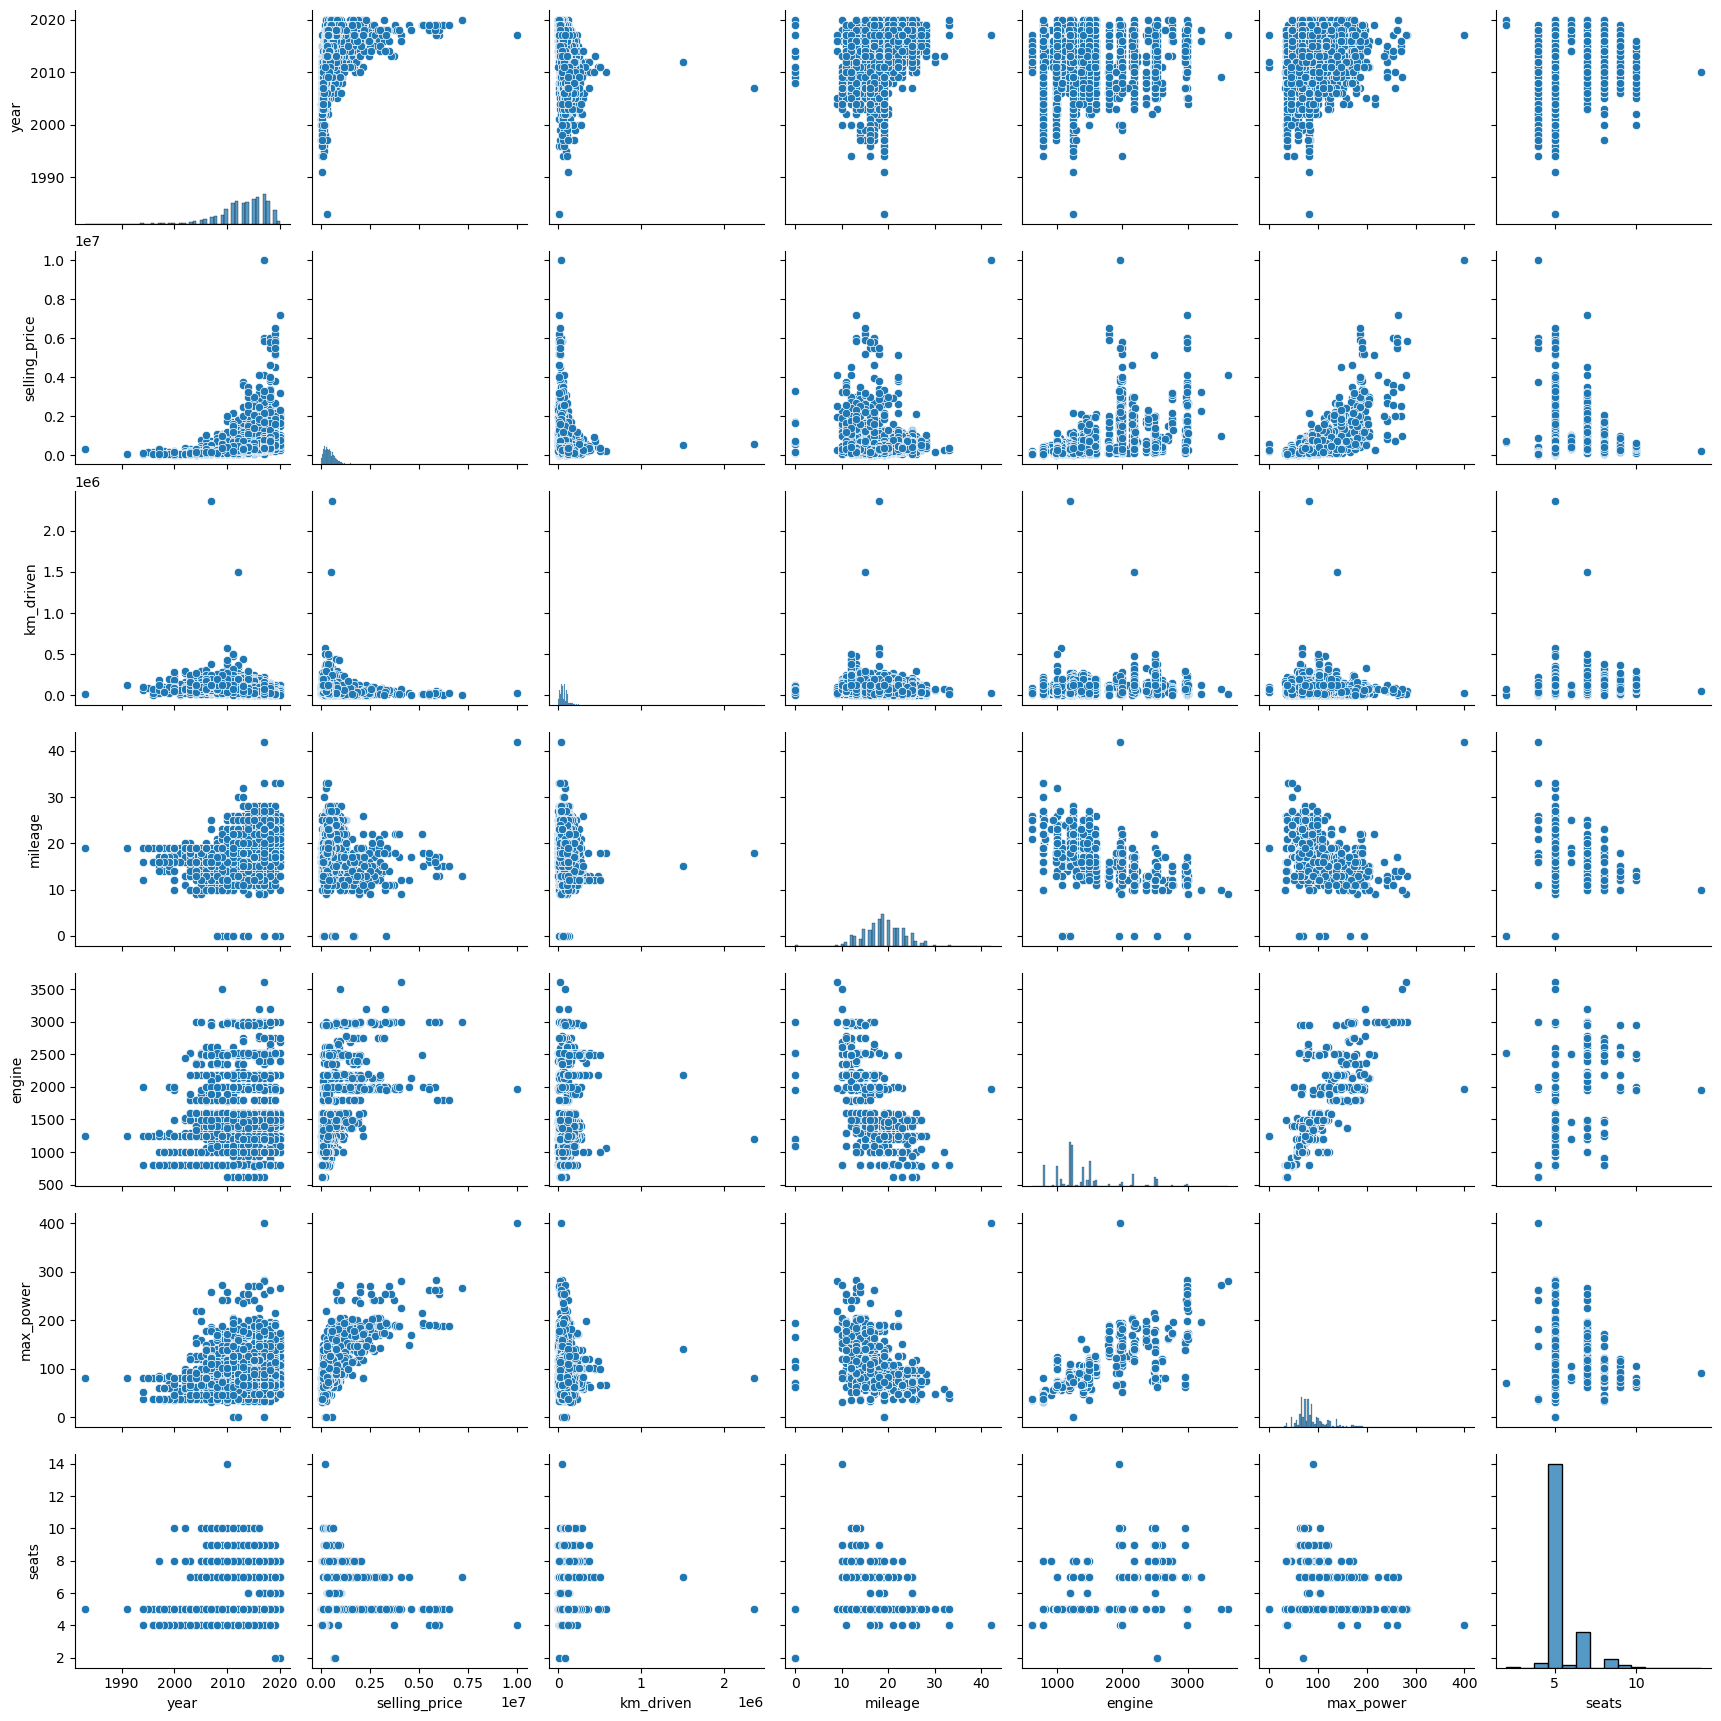

In [21]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [22]:
print('На первый взгляд корреляция признаков с целевой переменной кажется слабой. Скорее всего, слабая положительная с предиктором year, engine, max_power, слабая отрицательная - с km_driven. Возможно, стоит логарифмировать данные и посмотреть дальше')

На первый взгляд корреляция признаков с целевой переменной кажется слабой. Скорее всего, слабая положительная с предиктором year, engine, max_power, слабая отрицательная - с km_driven. Возможно, стоит логарифмировать данные и посмотреть дальше


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

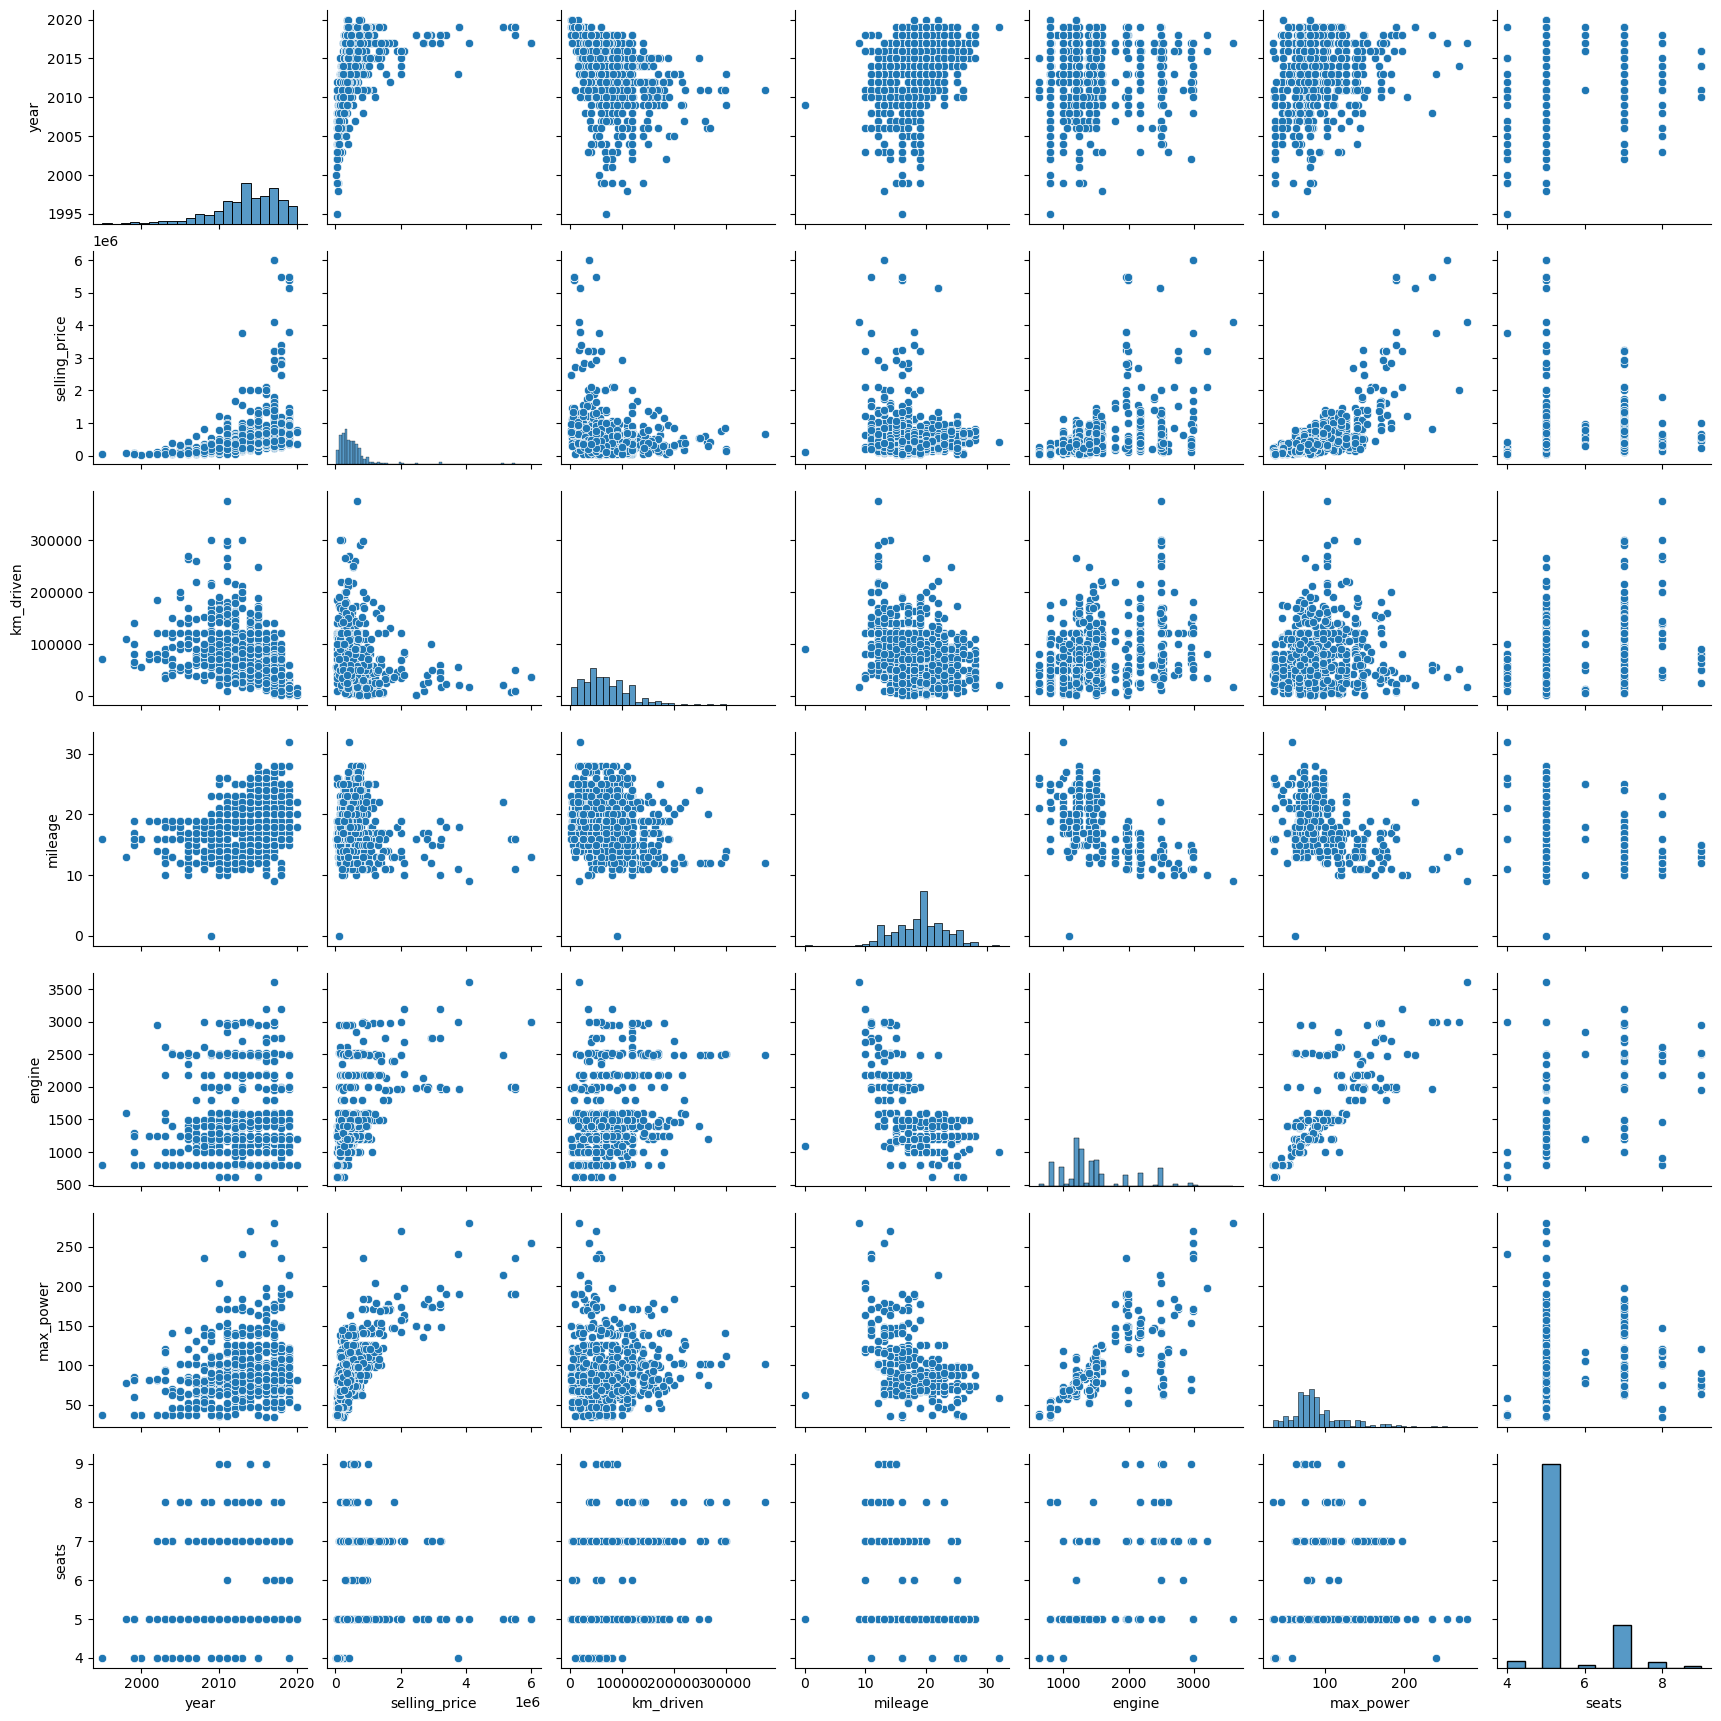

In [23]:
%matplotlib inline
sns.pairplot(df_test)

Между трейном и тестом есть что-то схожее, но много и различий:

    1. selling price и year в тесте скоррелированы слабо положительно, про трейн такого нельзя сказать; вообще в тесте больше слабых положительных корреляций
    
    2. корреляции selling price и seats выглядят похожими
    
    3. у признака year корреляции выглядят похожими между трейном и тестом, также как и у признака engine

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [24]:
df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.0,1248,74.0,5
1,2014,370000,120000,21.0,1498,103.0,5
2,2010,225000,127000,23.0,1396,90.0,5
3,2007,130000,120000,16.0,1298,88.0,5
4,2017,440000,45000,20.0,1197,81.0,5
...,...,...,...,...,...,...,...
5835,2008,120000,191000,17.0,1086,62.0,5
5836,2013,260000,50000,18.0,998,67.0,5
5837,2013,320000,110000,18.0,1197,82.0,5
5838,2007,135000,119000,16.0,1493,110.0,5


<AxesSubplot:>

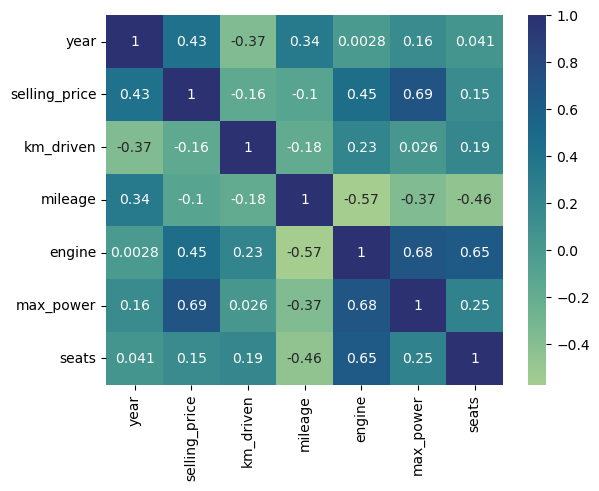

In [25]:
sns.heatmap(df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1).corr(), cmap="crest", annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. engine и year

2. engine и max_power

3. В целом да, корреляция отрицательная, но не такая сильна

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

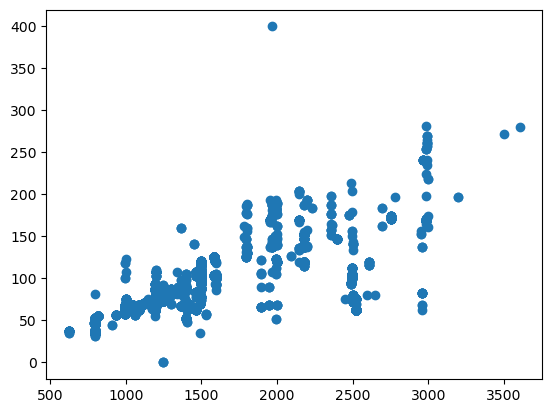

In [26]:
plt.scatter(df_train.engine, df_train.max_power)

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

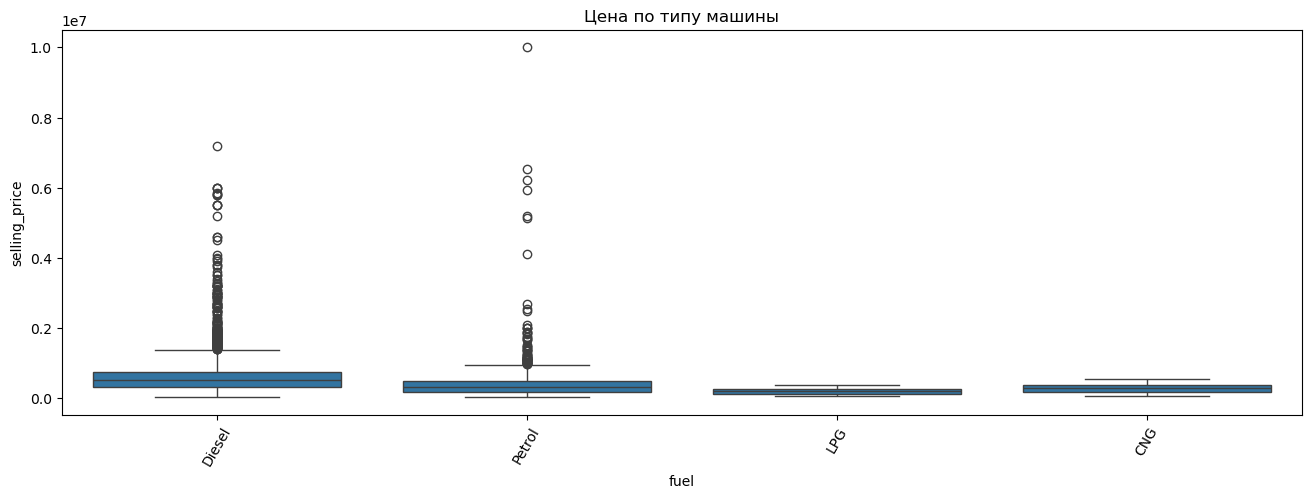

In [27]:
# кажется важным посмотреть на распределения целевой переменной по некоторым категориальным признакам
# нарисую боксплоты
# если они окажутся одинаковыми, скорее всего, признак будет бесполезен
fig, axs = plt.subplots(1)
fig.set_size_inches(16, 5)

sns.boxplot(data=df_train, x = 'fuel', y = 'selling_price').set_title("Цена по типу машины")

plt.xticks(rotation=60)
plt.show()

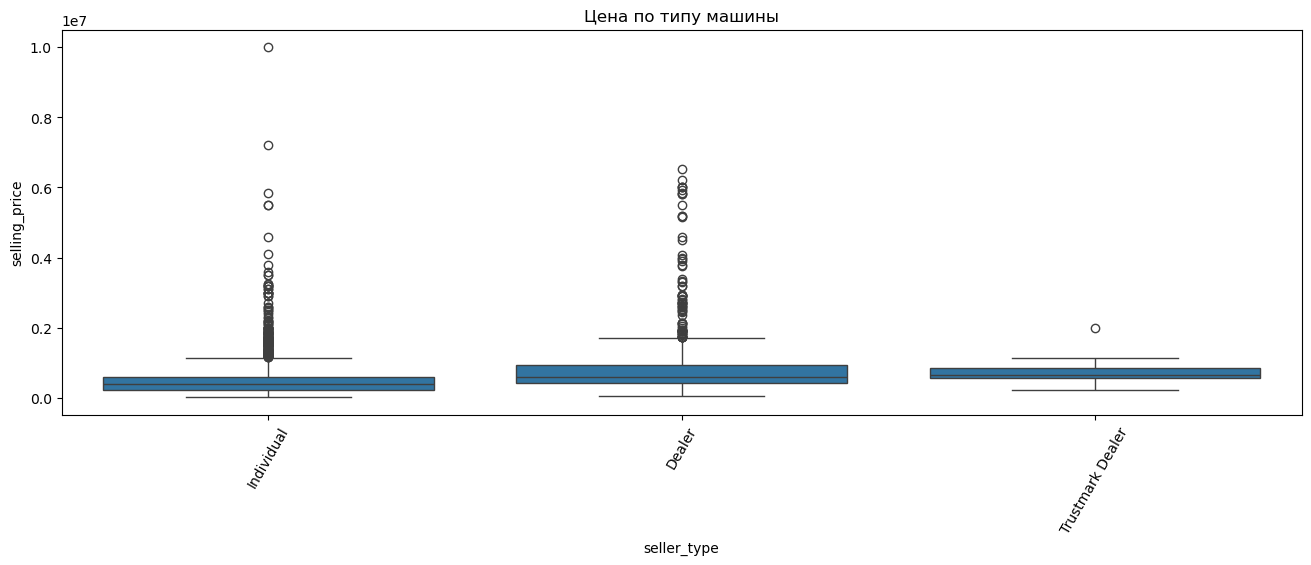

In [28]:
fig, axs = plt.subplots(1)
fig.set_size_inches(16, 5)

sns.boxplot(data=df_train, x = 'seller_type', y = 'selling_price').set_title("Цена по типу машины")

plt.xticks(rotation=60)
plt.show()

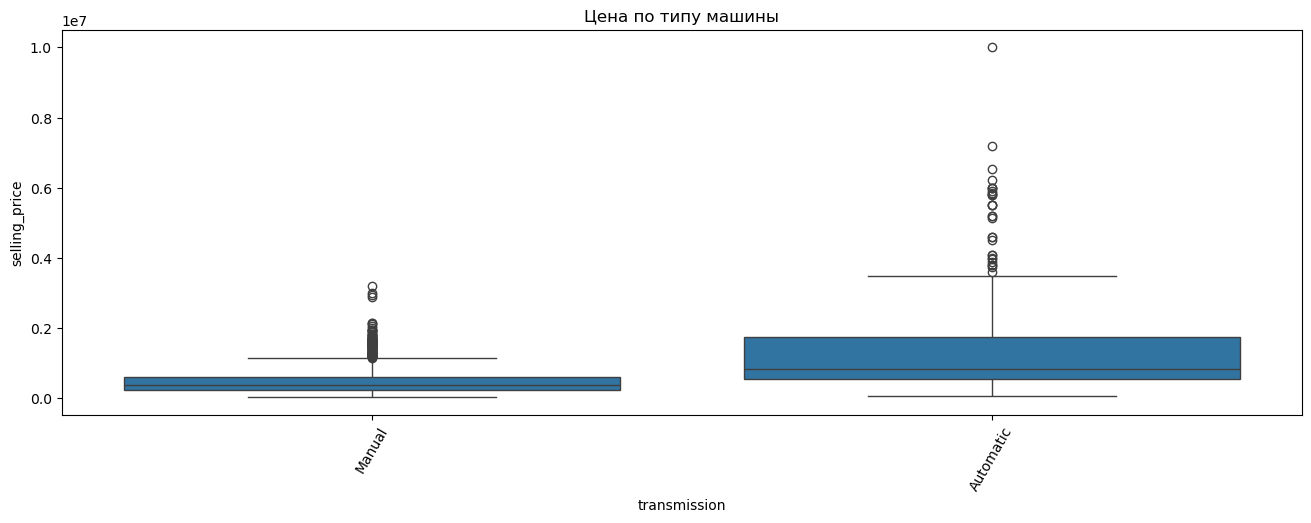

In [29]:
fig, axs = plt.subplots(1)
fig.set_size_inches(16, 5)

sns.boxplot(data=df_train, x = 'transmission', y = 'selling_price').set_title("Цена по типу машины")

plt.xticks(rotation=60)
plt.show()

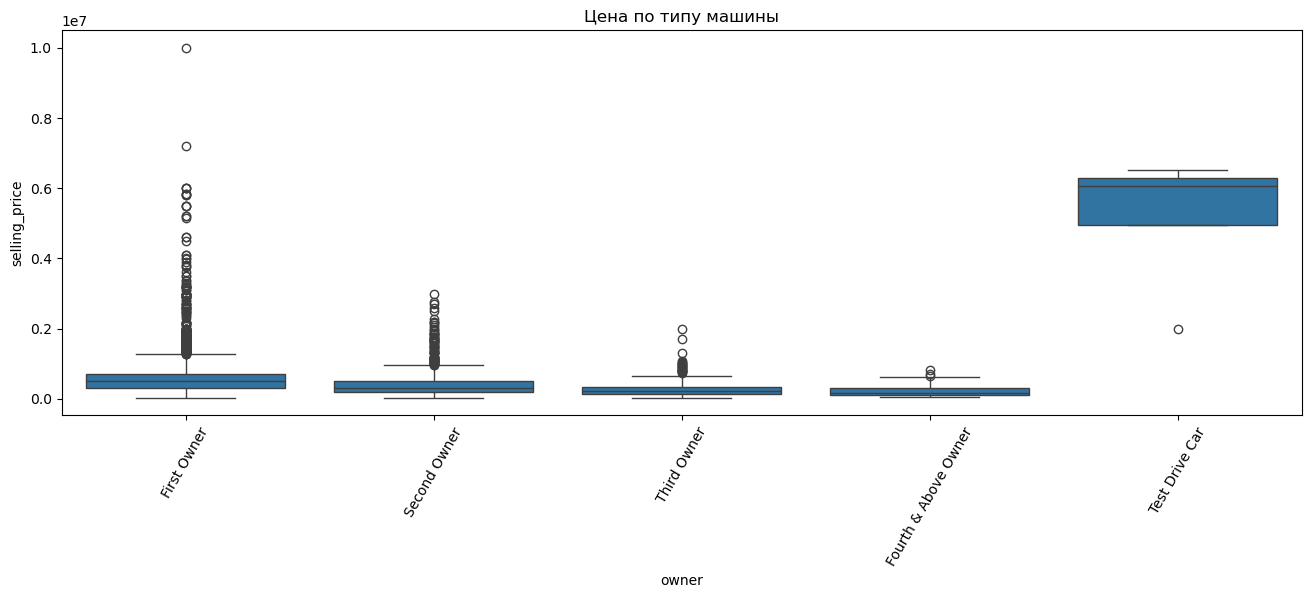

In [30]:
fig, axs = plt.subplots(1)
fig.set_size_inches(16, 5)

sns.boxplot(data=df_train, x = 'owner', y = 'selling_price').set_title("Цена по типу машины")

plt.xticks(rotation=60)
plt.show()

Кажется, что во всех случаях распределения целевой переменной различаются. Это говорит о том, что такие признаки могут оказывать важное влияние на целевую переменную, следовательно, для модели их стоит сохранить

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [31]:
y_train = df_train['selling_price']
X_train = df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'], axis=1)

In [32]:
assert X_train.shape == (5840, 6)

In [33]:
y_test = df_test['selling_price']
X_test = df_test.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'], axis=1)

In [34]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression().fit(X_train, y_train)

In [36]:
print(f"Трейн_r2: {r2_score(y_train, model.predict(X_train))}")
print(f"Тест_r2: {r2_score(y_test, model.predict(X_test))}")

Трейн_r2: 0.5922761184948105
Тест_r2: 0.594781302444064


In [37]:
print(f"Трейн_mse: {MSE(y_train, model.predict(X_train))}")
print(f"Тест_mse: {MSE(y_test, model.predict(X_test))}")

Трейн_mse: 116869295903.47534
Тест_mse: 232931278633.77036


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [39]:
model = LinearRegression().fit(scaler.transform(X_train), y_train)

In [40]:
print(f"Трейн_r2: {r2_score(y_train, model.predict(scaler.transform(X_train)))}")
print(f"Тест_r2: {r2_score(y_test, model.predict(scaler.transform(X_test)))}")

Трейн_r2: 0.5922761184948114
Тест_r2: 0.5947813024440741


In [41]:
print(f"Трейн_mse: {MSE(y_train, model.predict(scaler.transform(X_train)))}")
print(f"Тест_mse: {MSE(y_test, model.predict(scaler.transform(X_test)))}")

Трейн_mse: 116869295903.47508
Тест_mse: 232931278633.7645


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [42]:
print(f"Вес свободного коэффициента {model.intercept_}")

for i in range(0, len(X_train.columns)):
    print(f"Вес для фичи {X_train.columns[i]} составляет {round(model.coef_[i],0)}")

Вес свободного коэффициента 522960.0910958867
Вес для фичи year составляет 154231.0
Вес для фичи km_driven составляет -43883.0
Вес для фичи mileage составляет 26307.0
Вес для фичи engine составляет 59728.0
Вес для фичи max_power составляет 322659.0
Вес для фичи seats составляет -23816.0


Кажется, что наиболее информативен max_power 

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize=True).fit(scaler.transform(X_train), y_train)

In [44]:
print(f"Трейн_r2: {r2_score(y_train, lasso.predict(scaler.transform(X_train)))}")
print(f"Тест_r2: {r2_score(y_test, lasso.predict(scaler.transform(X_test)))}")

Трейн_r2: 0.5922759175156213
Тест_r2: 0.5946936197596346


In [45]:
print(f"Трейн_mse: {MSE(y_train, lasso.predict(scaler.transform(X_train)))}")
print(f"Тест_mse: {MSE(y_test, lasso.predict(scaler.transform(X_test)))}")

Трейн_mse: 116869353511.81621
Тест_mse: 232981681144.6154


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [46]:
print(f"Вес свободного коэффициента {lasso.intercept_}")

for i in range(0, len(X_train.columns)):
    print(f"Вес для фичи {X_train.columns[i]} составляет {round(lasso.coef_[i],0)}")

Вес свободного коэффициента 522960.0910958867
Вес для фичи year составляет 154213.0
Вес для фичи km_driven составляет -43799.0
Вес для фичи mileage составляет 26170.0
Вес для фичи engine составляет 59363.0
Вес для фичи max_power составляет 322728.0
Вес для фичи seats составляет -23597.0


Кажется, никакие веса вообще не изменились

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [47]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(scaler.transform(X_train), y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 319.92671377973846}
0.5742489487159677


In [48]:
lasso_model.fit(scaler.transform(X_train), y_train)

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

10 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Коэффициент регуляризации у лучшей получился 'alpha': 319.92671377973846. Занулились почти все, кроме свободного коэффициента, year, km_driven и max_power.

In [49]:
lasso_1 = Lasso(normalize=True, alpha = lasso_model.best_params_['alpha']).fit(scaler.transform(X_train), y_train)

In [50]:
print(f"Вес свободного коэффициента {lasso_1.intercept_}")

for i in range(0, len(X_train.columns)):
    print(f"Вес для фичи {X_train.columns[i]} составляет {round(lasso_1.coef_[i],0)}")

Вес свободного коэффициента 522960.0910958869
Вес для фичи year составляет 147413.0
Вес для фичи km_driven составляет -17686.0
Вес для фичи mileage составляет 0.0
Вес для фичи engine составляет 0.0
Вес для фичи max_power составляет 323891.0
Вес для фичи seats составляет -0.0


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [51]:
from sklearn.linear_model import ElasticNet

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
en = ElasticNet(normalize=True)
en_model = GridSearchCV(en, params, cv = 10)
en_model.fit(scaler.transform(X_train), y_train)
print(en_model.best_params_)
print(en_model.best_score_)

{'alpha': 5.214008287999695e-05}
0.5758671158284867


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [52]:
print(en_model.best_params_)

{'alpha': 5.214008287999695e-05}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [53]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)

In [54]:
assert X_train_cat.shape == (5840, 10)

In [55]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [56]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat['seats'] = X_train_cat['seats'].astype('str')
X_train_cat = X_train_cat[['year', 'km_driven', 'mileage', 'engine', 
             'max_power']].merge(pd.get_dummies(X_train_cat[['fuel', 
              'seller_type', 'transmission', 'owner', 'seats']], drop_first = True), left_index = True, right_index=True)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 1000, scoring='r2')
ridge_model.fit(StandardScaler().fit(X_train_cat).transform(X_train_cat), y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 1.2045035402587836}
0.07912534631845504


In [58]:
ridge_1 = Ridge(normalize=True, 
            alpha = ridge_model.best_params_['alpha']).fit(StandardScaler().fit(X_train_cat).transform(X_train_cat), y_train)

In [59]:
print(f"Вес свободного коэффициента {ridge_1.intercept_}")

for i in range(0, len(X_train_cat.columns)):
    print(f"Вес для фичи {X_train_cat.columns[i]} составляет {round(ridge_1.coef_[i],0)}")

Вес свободного коэффициента 522960.0910958886
Вес для фичи year составляет 76542.0
Вес для фичи km_driven составляет -30387.0
Вес для фичи mileage составляет -274.0
Вес для фичи engine составляет 52556.0
Вес для фичи max_power составляет 119469.0
Вес для фичи fuel_Diesel составляет 22458.0
Вес для фичи fuel_LPG составляет -1610.0
Вес для фичи fuel_Petrol составляет -21263.0
Вес для фичи seller_type_Individual составляет -33681.0
Вес для фичи seller_type_Trustmark Dealer составляет -527.0
Вес для фичи transmission_Manual составляет -71514.0
Вес для фичи owner_Fourth & Above Owner составляет -11217.0
Вес для фичи owner_Second Owner составляет -24613.0
Вес для фичи owner_Test Drive Car составляет 45681.0
Вес для фичи owner_Third Owner составляет -16899.0
Вес для фичи seats_14 составляет -2037.0
Вес для фичи seats_2 составляет -388.0
Вес для фичи seats_4 составляет 16806.0
Вес для фичи seats_5 составляет -9994.0
Вес для фичи seats_6 составляет -2515.0
Вес для фичи seats_7 составляет 10649.

In [60]:
print(f"Трейн_r2: {r2_score(y_train, ridge_1.predict(StandardScaler().fit(X_train_cat).transform(X_train_cat)))}")

Трейн_r2: 0.5533511656087555


Нет, здесь, судя по уменьшевшейся r2, не улучшилось качество модели

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [61]:
# выделим марку машины

In [62]:
df_train['car_name'] = df_train['name'].str.split(' ').str[0]

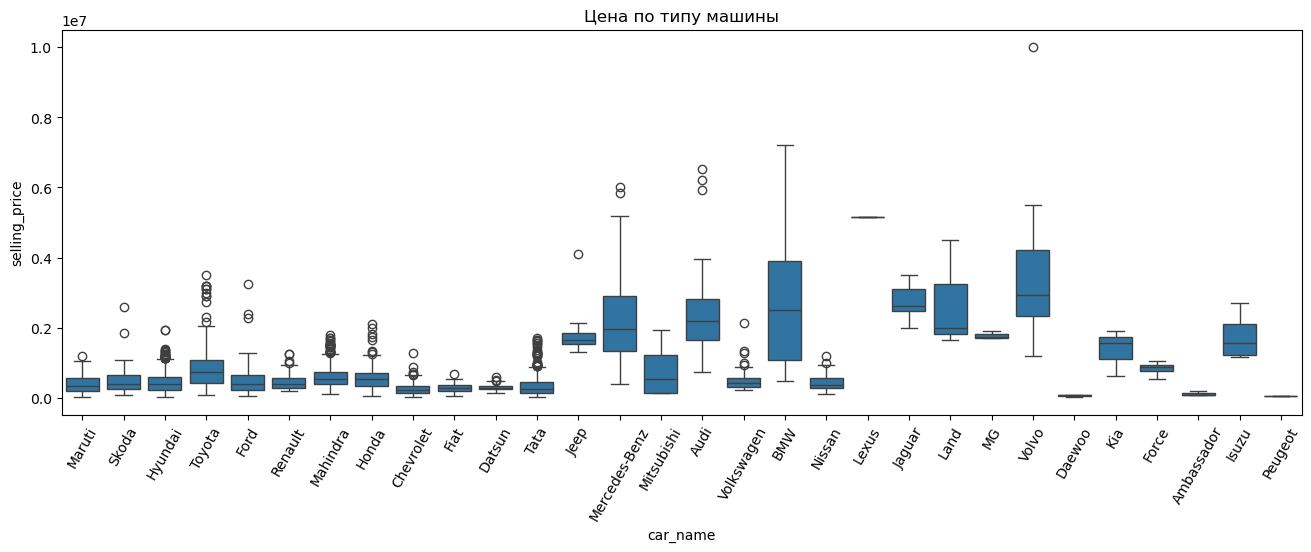

In [63]:
# посмотрим, был ли в этом вообще смысл
%matplotlib inline
fig, axs = plt.subplots(1)
fig.set_size_inches(16, 5)

sns.boxplot(data=df_train, x = 'car_name', y = 'selling_price').set_title("Цена по типу машины")

plt.xticks(rotation=60)
plt.show()

Кажется, можно оставить. Боксплоты значительно различаются между собой, некорректно выкидывать такой признак.

C:\Users\60135487\AppData\Local\Temp\ipykernel_21796\3791914089.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['year'], hist=True, kde=False,


Text(0, 0.5, 'Количество')

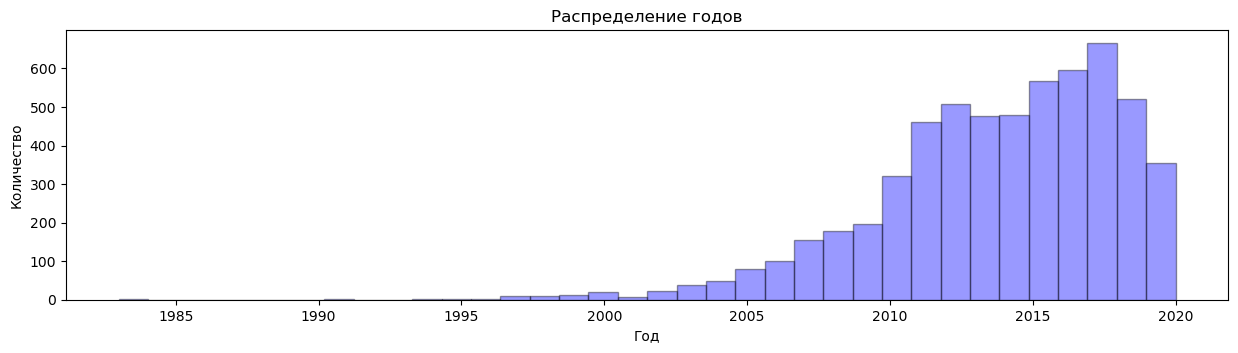

In [64]:
%matplotlib inline
f, (ax1) = plt.subplots(1, sharey=True, figsize=(15, 3.5))
fig.set_size_inches(16, 5)


sns.distplot(df_train['year'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение годов')
plt.xlabel('Год')
plt.ylabel('Количество')

C:\Users\60135487\AppData\Local\Temp\ipykernel_21796\2909327670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_train['year']), hist=True, kde=False,


Text(0, 0.5, 'Количество')

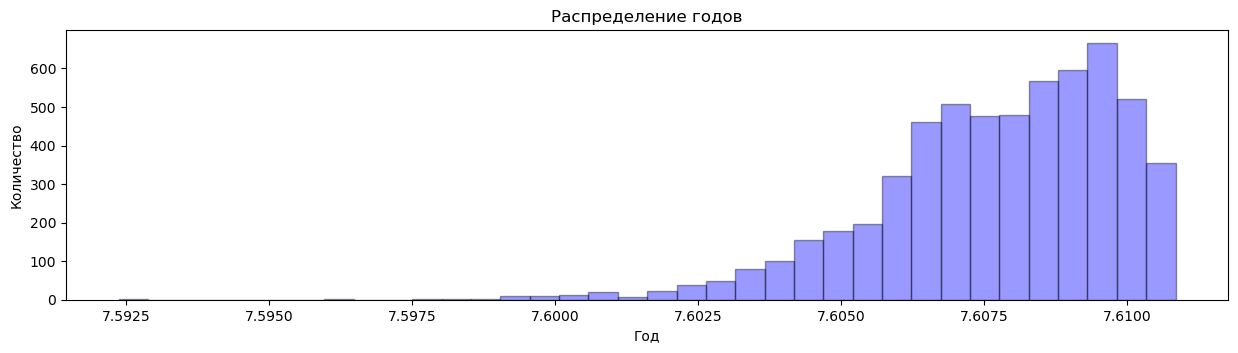

In [65]:
%matplotlib inline
f, (ax1) = plt.subplots(1, sharey=True, figsize=(15, 3.5))
fig.set_size_inches(16, 5)


sns.distplot(np.log(df_train['year']), hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение годов')
plt.xlabel('Год')
plt.ylabel('Количество')
# непохоже чтобы стало лучше

C:\Users\60135487\AppData\Local\Temp\ipykernel_21796\2414989089.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['km_driven'], hist=True, kde=False,


Text(0, 0.5, 'Количество')

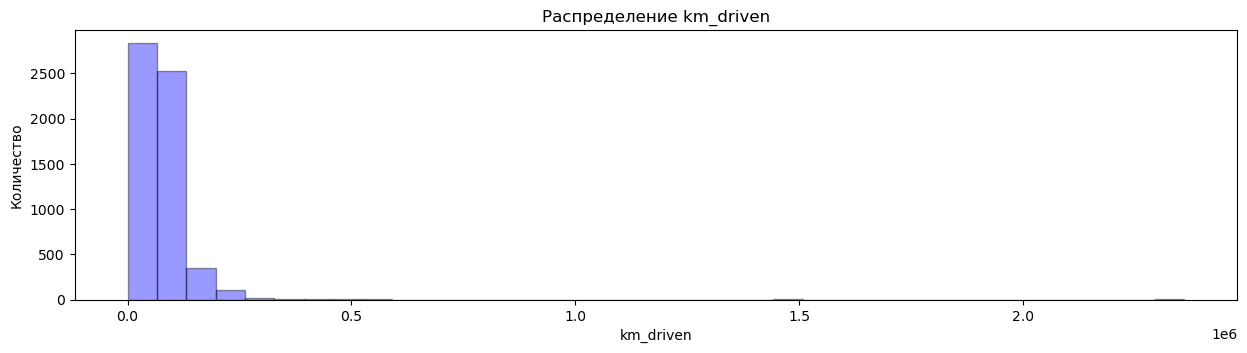

In [66]:
%matplotlib inline
f, (ax1) = plt.subplots(1, sharey=True, figsize=(15, 3.5))
fig.set_size_inches(16, 5)


sns.distplot(df_train['km_driven'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение km_driven')
plt.xlabel('km_driven')
plt.ylabel('Количество')

C:\Users\60135487\AppData\Local\Temp\ipykernel_21796\1746557222.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_train['km_driven']), hist=True, kde=False,


Text(0, 0.5, 'Количество')

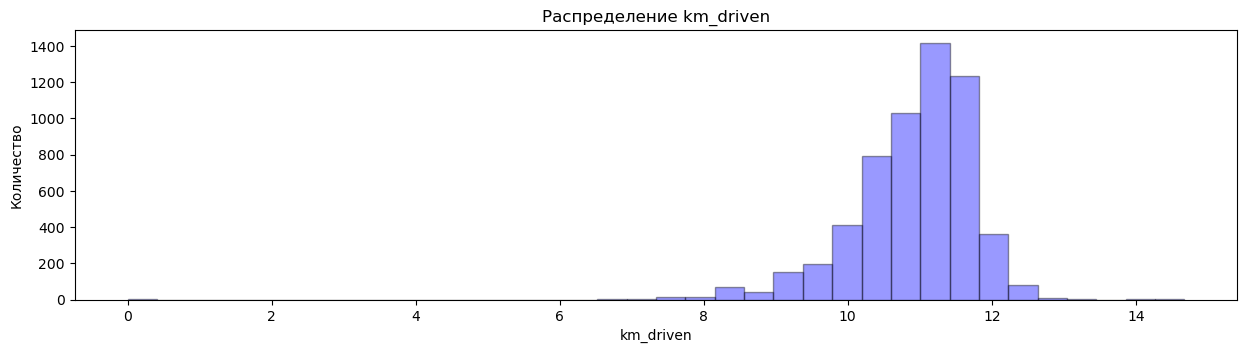

In [67]:
%matplotlib inline
f, (ax1) = plt.subplots(1, sharey=True, figsize=(15, 3.5))
fig.set_size_inches(16, 5)


sns.distplot(np.log(df_train['km_driven']), hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение km_driven')
plt.xlabel('km_driven')
plt.ylabel('Количество')
# кажется, сейчас оно более нормальное

C:\Users\60135487\AppData\Local\Temp\ipykernel_21796\169490632.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['mileage'], hist=True, kde=False,


Text(0, 0.5, 'Количество')

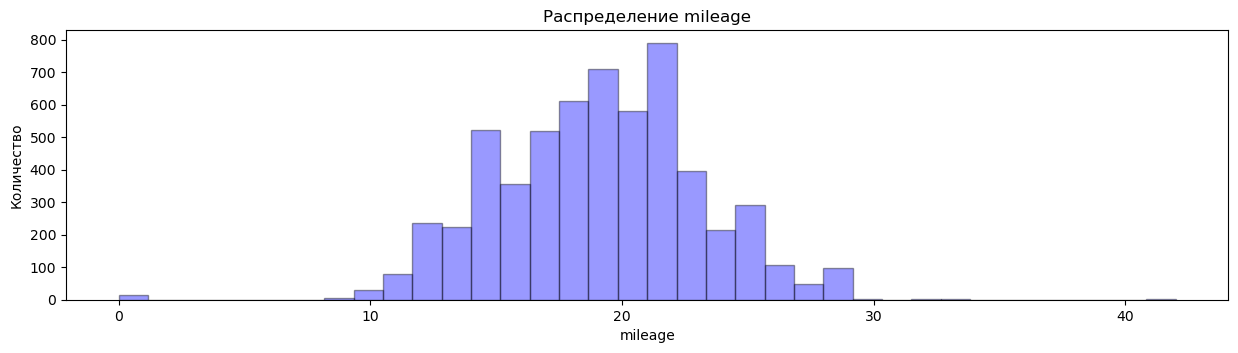

In [68]:
%matplotlib inline
f, (ax1) = plt.subplots(1, sharey=True, figsize=(15, 3.5))
fig.set_size_inches(16, 5)


sns.distplot(df_train['mileage'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение mileage')
plt.xlabel('mileage')
plt.ylabel('Количество')
# кажется, здесь распределение и так близко к нормальному

C:\Users\60135487\AppData\Local\Temp\ipykernel_21796\1822019387.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['engine'], hist=True, kde=False,


Text(0, 0.5, 'Количество')

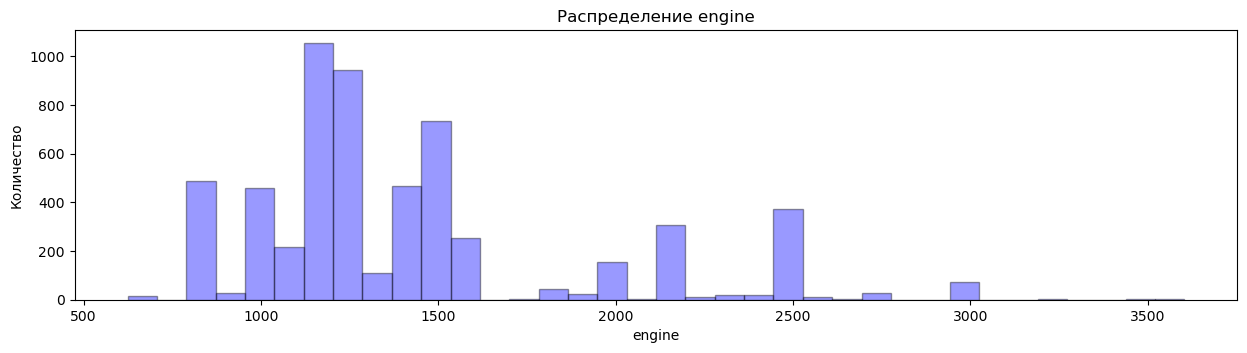

In [69]:
%matplotlib inline
f, (ax1) = plt.subplots(1, sharey=True, figsize=(15, 3.5))
fig.set_size_inches(16, 5)


sns.distplot(df_train['engine'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение engine')
plt.xlabel('engine')
plt.ylabel('Количество')

C:\Users\60135487\AppData\Local\Temp\ipykernel_21796\754698490.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_train['engine']), hist=True, kde=False,


Text(0, 0.5, 'Количество')

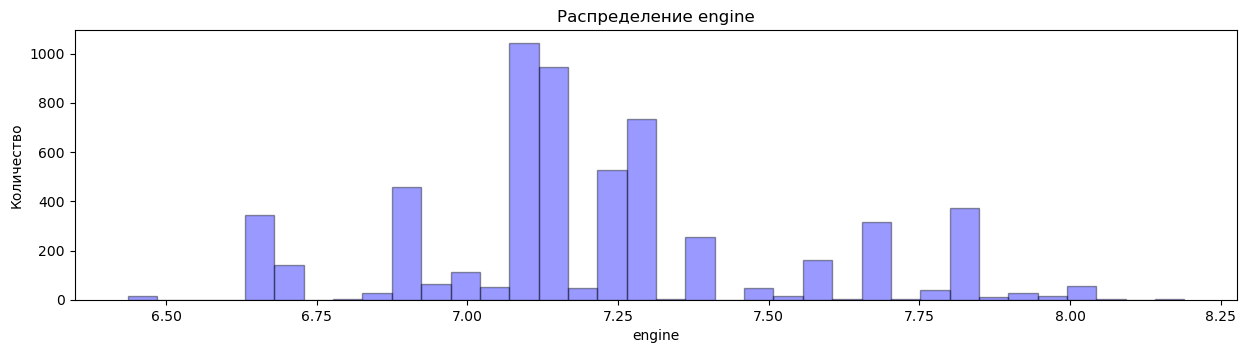

In [70]:
%matplotlib inline
f, (ax1) = plt.subplots(1, sharey=True, figsize=(15, 3.5))
fig.set_size_inches(16, 5)


sns.distplot(np.log(df_train['engine']), hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение engine')
plt.xlabel('engine')
plt.ylabel('Количество')
# непохоже чтобы стало лучше

C:\Users\60135487\AppData\Local\Temp\ipykernel_21796\1284207369.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['max_power'], hist=True, kde=False,


Text(0, 0.5, 'Количество')

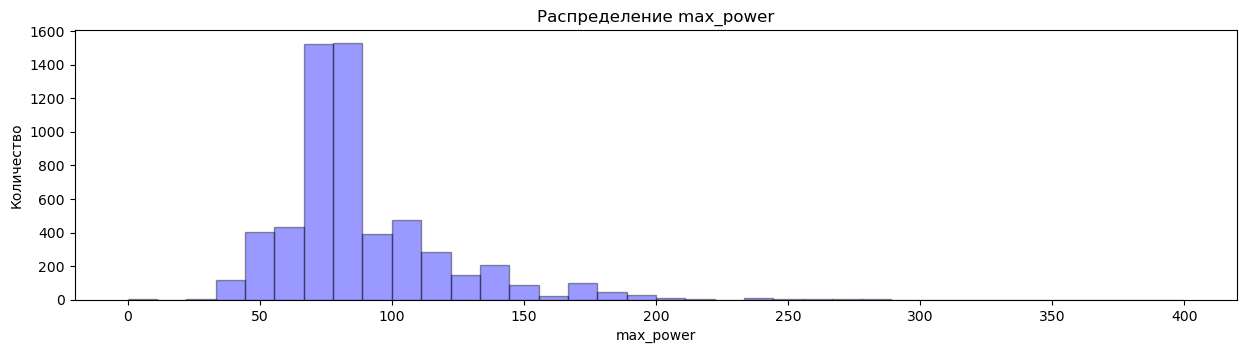

In [71]:
%matplotlib inline
f, (ax1) = plt.subplots(1, sharey=True, figsize=(15, 3.5))
fig.set_size_inches(16, 5)


sns.distplot(df_train['max_power'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение max_power')
plt.xlabel('max_power')
plt.ylabel('Количество')

Итого,
логарифмируем km_driven, остальное оставим как есть

In [82]:
y = df_train['selling_price']
X = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power']].merge(pd.get_dummies(df_train[['fuel', 'seller_type', 
                     'transmission', 'owner', 'seats', 'car_name']], drop_first = True), left_index = True, right_index=True)

In [83]:
scaler = StandardScaler().fit(X)
params = {'alpha': (np.logspace(-8, 8, 100))}
en = ElasticNet(normalize=True)
en_model = GridSearchCV(en, params, cv = 10)
en_model.fit(scaler.transform(X), y)
print(en_model.best_params_)
print(en_model.best_score_)

{'alpha': 5.214008287999695e-05}
0.6968823163178426


In [84]:
en_model_1 = ElasticNet(normalize=True, 
            alpha = en_model.best_params_['alpha']).fit(scaler.transform(X), y)

In [94]:
import pickle
pickle.dump(en_model_1, open('en_model_1.pkl', 'wb'))

In [189]:
new_features = ['fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Manual',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner',
 'car_name_Audi',
 'car_name_BMW',
 'car_name_Chevrolet',
 'car_name_Daewoo',
 'car_name_Datsun',
 'car_name_Fiat',
 'car_name_Force',
 'car_name_Ford',
 'car_name_Honda',
 'car_name_Hyundai',
 'car_name_Isuzu',
 'car_name_Jaguar',
 'car_name_Jeep',
 'car_name_Kia',
 'car_name_Land',
 'car_name_Lexus',
 'car_name_MG',
 'car_name_Mahindra',
 'car_name_Maruti',
 'car_name_Mercedes-Benz',
 'car_name_Mitsubishi',
 'car_name_Nissan',
 'car_name_Peugeot',
 'car_name_Renault',
 'car_name_Skoda',
 'car_name_Tata',
 'car_name_Toyota',
 'car_name_Volkswagen',
 'car_name_Volvo']

In [198]:
# сохраним фичи
with open("new_features.txt", "w") as file:
    print(*new_features, file=file, sep="\n")

In [202]:
import joblib

joblib.dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [92]:
def business_metrics(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    N = len(y_true)
    good = []
    for i in range(0, N):
        if abs((y_pred[i] - y_true[i]) / y_true[i]) <= 0.1:
            good.append(1)
    return round(sum(good) / N, 2)

business_metrics(y, en_model_1.predict(scaler.transform(X)))

0.26

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [256]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import joblib
import pickle

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    # получаем список сгенерированных фичей
    with open('new_features.txt') as f:
        new_features = [(line.strip()) for line in f.readlines()]
    del item['torque']
    # приводим json к требуему виду со всеми фичами
    item['car_name'] = item['name'].split(' ')[0]
    del item['name']
    for i in ['mileage', 'engine', 'max_power']:
        item[i] = float(item[i].split(' ')[0])
    for j in new_features:
        item[j] = 0
    for k in ['fuel', 'seller_type', 
            'transmission', 'owner', 'car_name']:
        if str(k)+'_'+str(item[k]) in list(item.keys()):
            item[f"{k}_{item[k]}"] = 1
        del item[k]
    
    # скалируем фичи
    item_df = pd.json_normalize(item)
    sc=joblib.load('std_scaler.bin')
    
    # считываем модель и делаем предсказание цены
    pickled_model = pickle.load(open('en_model_1.pkl', 'rb'))
    predict = pickled_model.predict(sc.transform(pd.json_normalize(item_df)))
    
    return predict


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    # получаем список сгенерированных фичей
    with open('new_features.txt') as f:
        new_features = [(line.strip()) for line in f.readlines()]
    items = items.drop('torque', axis=1)
    
    items['car_name'] = items['name'].str.split(' ').str[0]
    items = items.drop('name', axis=1)
    
    for col in ['mileage', 'engine', 'max_power']:
        items[col] = items[col].str.split(' ').fillna(0).str[0].str.extract(r'(\d+)', expand=False).astype(float)

    for j in new_features:
        items[j] = 0
    for k in ['fuel', 'seller_type', 
            'transmission', 'owner', 'car_name']:
        if str(k)+'_'+str(items[k]) in list(items.columns):
            items[f"{k}_{items[k]}"] = 1
        items = items.drop(k, axis=1)
    
    sc=joblib.load('std_scaler.bin')
    
    # считываем модель и делаем предсказание цены
    pickled_model = pickle.load(open('en_model_1.pkl', 'rb'))
    predict_list = pickled_model.predict(sc.transform(items))
    
    return predict_list

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link